In [1]:
from pathlib import Path

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
DATA_PATH = Path().resolve().parent / "data"
DATA_FILE = DATA_PATH / "brett2024_ic_traveltimes.parquet"

df = pd.read_parquet(DATA_FILE)
df.shape

(7668, 8)

In [3]:
phases = np.unique_values(df.reference_phase.values)

Text(0.5, 0.98, 'Inner Core Entry and Exit Points by Reference Phase')

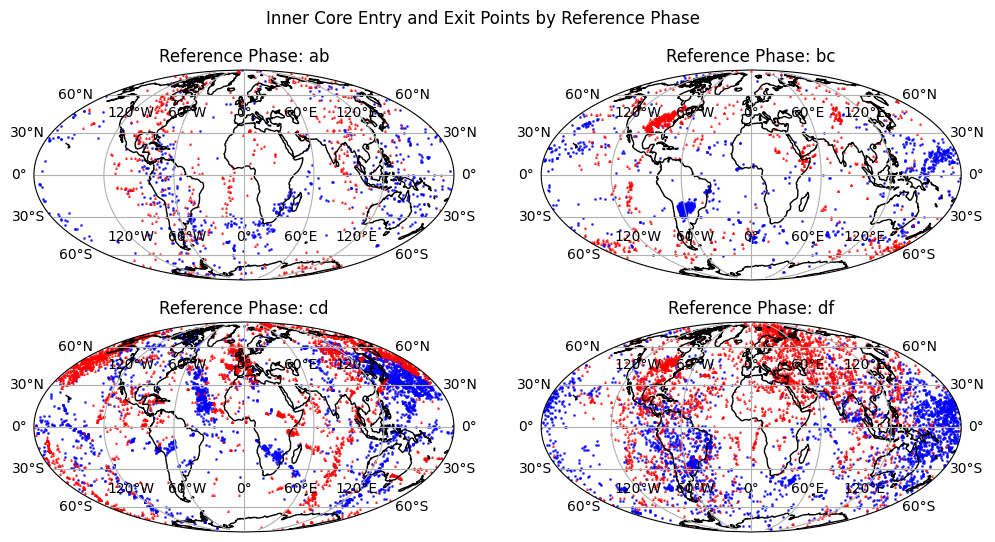

In [4]:
def plot_ic_inout(ax: plt.Axes, ic_in: np.ndarray, ic_out: np.ndarray) -> None:
    """Plot entry and exit points of paths through the inner core on a world map.

    Parameters
    ----------
    ax : plt.Axes
        Matplotlib axes to plot on (should be a cartopy projection).
    ic_in : ndarray, shape (num_paths, 3)
        Entry points of paths into the inner core (longitude (deg), latitude (deg), radius (km)).
    ic_out : ndarray, shape (num_paths, 3)
        Exit points of paths from the inner core (longitude (deg), latitude (deg), radius (km)).
    """

    ax.scatter(
        ic_in[:, 0],
        ic_in[:, 1],
        color="blue",
        marker="o",
        s=1,
        label="IC Entry Points",
        transform=ccrs.PlateCarree(),
        alpha=0.7,
    )
    ax.scatter(
        ic_out[:, 0],
        ic_out[:, 1],
        color="red",
        marker="^",
        s=1,
        label="IC Exit Points",
        transform=ccrs.PlateCarree(),
        alpha=0.7,
    )


fig, axs = plt.subplots(
    2, 2, subplot_kw={"projection": ccrs.Mollweide()}, figsize=(12, 6)
)
for ax, phase in zip(axs.flatten(), phases):
    ax.coastlines()
    ax.set_global()
    ax.gridlines(draw_labels=True)
    ax.set_title(f"Reference Phase: {phase}")

    subset = df[df.reference_phase == phase]
    ic_in = np.stack(subset.in_location.values)
    ic_out = np.stack(subset.out_location.values)
    plot_ic_inout(ax, ic_in, ic_out)

fig.suptitle("Inner Core Entry and Exit Points by Reference Phase")

Text(0.5, 0.98, 'Inner Core Paths by Reference Phase')

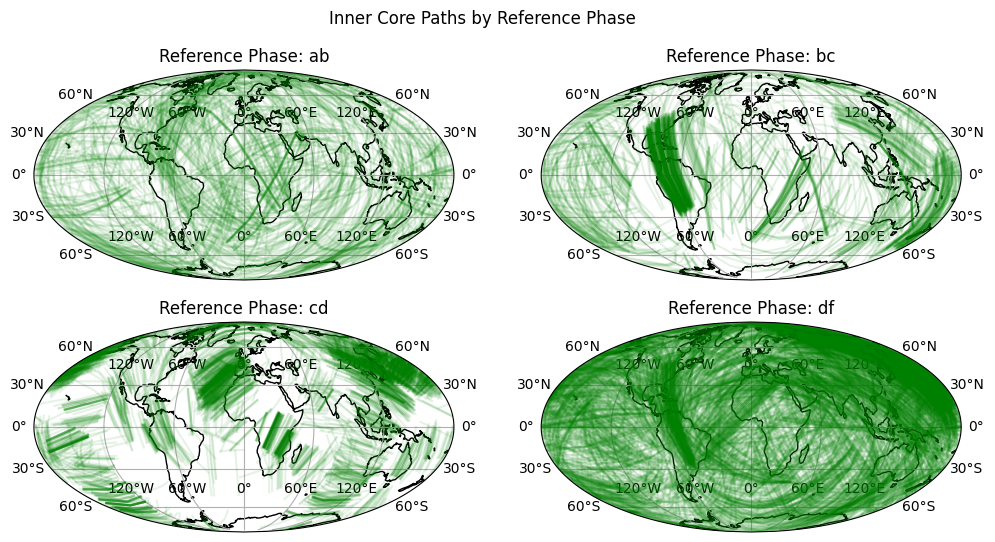

In [5]:
fig, axs = plt.subplots(
    2, 2, subplot_kw={"projection": ccrs.Mollweide()}, figsize=(12, 6)
)
for ax, phase in zip(axs.flatten(), phases):
    ax.coastlines()
    ax.set_global()
    ax.gridlines(draw_labels=True)
    ax.set_title(f"Reference Phase: {phase}")

    subset = df[df.reference_phase == phase]
    ic_in = np.stack(subset.in_location.values)
    ic_out = np.stack(subset.out_location.values)
    ax.plot(
        [ic_in[:, 0], ic_out[:, 0]],
        [ic_in[:, 1], ic_out[:, 1]],
        color="green",
        alpha=0.1,
        transform=ccrs.Geodetic(),  # straight lines through the inner core, not great circles
    )

    ax.set_title(f"Reference Phase: {phase}")


fig.suptitle("Inner Core Paths by Reference Phase")